In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.lin1 = nn.Linear(28*28, 150)
        self.relu1 = nn.ReLU()

        self.lin2 = nn.Linear(150, 150)
        self.tanh2 = nn.Tanh()

        self.lin3 = nn.Linear(150, 150)
        self.elu3 = nn.ELU()

        self.lin4 = nn.Linear(150, 10)
    
    def forward(self, x):
        out = x.view(-1, 28*28)

        out = self.lin1(out)
        out = self.relu1(out)

        out = self.lin2(out)
        out = self.tanh2(out)

        out = self.lin3(out)
        out = self.elu3(out)

        out = self.lin4(out)

        return out
        
    
def train(model, train_loader, x_train, y_train, x_val, y_val, optimizer, err, num_epochs):
    count = 0
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):

            # start training
            optimizer.zero_grad()
            outputs = model(images)
            loss = err(outputs, labels)
            loss.backward()
            optimizer.step()
            # end training

            count += 1

            if count % 50 == 0:
                # On whole training set
                
                train_outputs = model(x_train) # training outputs
                train_loss = err(train_outputs, y_train)
                _, predicted = torch.max(train_outputs.data, 1)
                train_total = y_train.size(0)
                train_correct = (predicted == y_train).sum().item()
                train_accuracy = train_correct / train_total * 100 # validation accuracy
                train_accuracies.append(train_accuracy)
                train_losses.append(loss.item())
                
                # On whole validation set
                val_outputs = model(x_val)
                val_loss = err(val_outputs, y_val)
                _, predicted = torch.max(val_outputs.data, 1)
                val_total = y_val.size(0)
                val_correct = (predicted == y_val).sum().item()
                val_accuracy = val_correct / val_total * 100 # validation accuracy
                val_accuracies.append(val_accuracy)
                val_losses.append(val_loss.item())
                
                if count % 500 == 0:
                    print(f'Iteration: {count}. Train Loss: {loss.item()}. Train Accuracy: {train_accuracy}. Val Loss: {val_loss.item()}. Val Accuracy: {val_accuracy}')

    return train_losses, train_accuracies, val_losses, val_accuracies

## 2. More Complex NN

In [2]:
train_data = pd.read_csv('D:/github/pytorch/pytorch/digit_recogniser/dataset/train.csv') 
test_data = pd.read_csv('D:/github/pytorch/pytorch/digit_recogniser/dataset/test.csv')

# get trainng DataFrame
x_train_df = train_data.drop('label', axis=1)
y_train_df = train_data['label']

x_test_df = test_data

# Split Training DataFrame into training and validation data
x_train_df, x_val_df, y_train_df, y_val_df = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42) # split training data into train and val data

# Convert DataFrame to numpy array
x_train_arr = x_train_df.values
y_train_arr = y_train_df.values

x_val_arr = x_val_df.values
y_val_arr = y_val_df.values

x_test_arr = x_test_df.values

# convert to tensor
x_train = torch.from_numpy(x_train_arr).float()
y_train = torch.from_numpy(y_train_arr).long()

x_val = torch.from_numpy(x_val_arr).float()
y_val = torch.from_numpy(y_val_arr).long()

x_test = torch.from_numpy(x_test_arr).float()

# normlalise data
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

# Reshape data
x_train = x_train.view(-1, 1, 28, 28)
x_val = x_val.view(-1, 1, 28, 28)
x_test = x_test.view(-1, 1, 28, 28)

# Define hyperparameters
batch_size = 64
n_iters = 10000
num_epochs = int(n_iters / (len(x_train) / batch_size))

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


model = ANNModel()

loss_fn = nn.CrossEntropyLoss()
lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = train(model, train_loader, x_train, y_train, x_val, y_val, optimizer, loss_fn, num_epochs)

Iteration: 500. Train Loss: 2.295076847076416. Train Accuracy: 10.726190476190476. Val Loss: 2.295170545578003. Val Accuracy: 10.238095238095237
Iteration: 1000. Train Loss: 2.2850704193115234. Train Accuracy: 19.205357142857142. Val Loss: 2.281505823135376. Val Accuracy: 19.226190476190478
Iteration: 1500. Train Loss: 2.2629904747009277. Train Accuracy: 33.520833333333336. Val Loss: 2.265498399734497. Val Accuracy: 33.785714285714285
Iteration: 2000. Train Loss: 2.243720769882202. Train Accuracy: 46.05357142857143. Val Loss: 2.2451581954956055. Val Accuracy: 47.01190476190476
Iteration: 2500. Train Loss: 2.227161407470703. Train Accuracy: 49.99404761904762. Val Loss: 2.2180895805358887. Val Accuracy: 50.797619047619044
Iteration: 3000. Train Loss: 2.187044620513916. Train Accuracy: 50.87797619047619. Val Loss: 2.181152582168579. Val Accuracy: 51.66666666666667
Iteration: 3500. Train Loss: 2.144263982772827. Train Accuracy: 52.11904761904762. Val Loss: 2.130326509475708. Val Accuracy: 

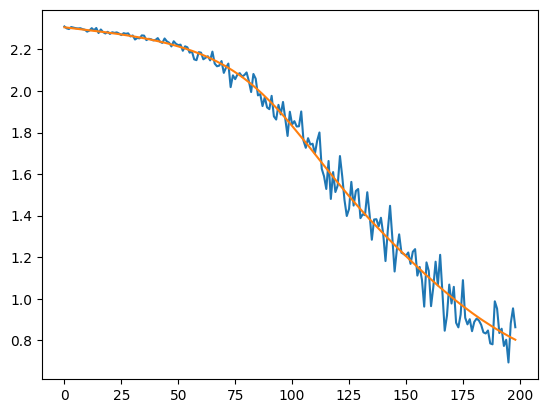

In [4]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.show()

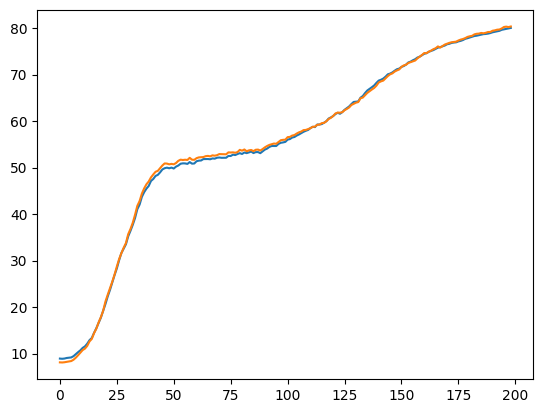

In [5]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Prediction: 1, Index: 3853')

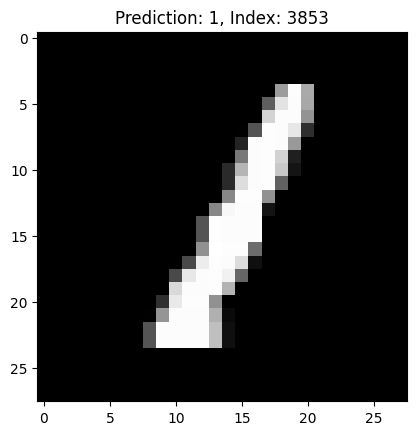

In [13]:
index = np.random.randint(0, x_test_arr.shape[0])
image = x_test_arr[index]
pred = torch.max(model(x_test[index]), 1)[1].item()
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Prediction: {pred}, Index: {index}')